In [40]:
import pandas as pd
from sklearn.linear_model import Ridge

In [41]:
stats = pd.read_csv("player_mvp_stats.csv")

In [42]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
1,Byron Scott,SG,30,LAL,82,82,32.7,5.6,12.3,0.458,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
2,Chucky Brown,SF,23,LAL,42,2,10.3,1.4,3.0,0.469,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
3,Cliff Robinson,PF,31,LAL,9,0,8.7,1.2,3.0,0.407,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
4,Demetrius Calip,PG,22,LAL,7,0,8.3,0.6,2.6,0.222,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14307,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14308,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14309,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14310,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [43]:
stats.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [44]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

We're taking out the string variables we also want to redict the percentage and share a player got in a given year so we've removed those variables

In [45]:
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

Can be ignored or deleated
___

In [46]:
# Generating new columns (replace this with your actual computation)
#stats['PTS_R'] = stats['PTS'] / stats['G']  # Points per game, as an example
#stats['AST_R'] = stats['AST'] / stats['G']  # Assists per game
#stats['STL_R'] = stats['STL'] / stats['G']  # Steals per game
#stats['BLK_R'] = stats['BLK'] / stats['G']  # Blocks per game
#stats['3P_R'] = stats['3P'] / stats['G']   # Three-Point Field Goals per game

___

In [47]:
train = stats[stats["Year"] < 2022]

In [48]:
test = stats[stats["Year"] == 2022]

Now we will start training the data

In [49]:
reg = Ridge(alpha= .1)

In [50]:
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [51]:
predictions = reg.predict(test[predictors])

In [52]:
predictions = pd.DataFrame(predictions, columns= ["Predictions"], index= test.index)

In [53]:
predictions

,Predictions
607,0.012898
608,-0.027958
609,-0.005991
610,0.016290
611,-0.004661
...,...
12206,-0.019648
12207,-0.010207
12208,0.003516
12209,0.000648


We will add the predictions column to the df. *Updated to add the "Year" column which also appears in the df's below*

In [54]:
combination = pd.concat([test[["Player", "Share", "Year"]], predictions], axis= 1)

In [55]:
combination

,Player,Share,Year,Predictions
607,Aaron Gordon,0.0,2022,0.012898
608,Austin Rivers,0.0,2022,-0.027958
609,Bol Bol,0.0,2022,-0.005991
610,Bones Hyland,0.0,2022,0.016290
611,Bryn Forbes,0.0,2022,-0.004661
...,...,...,...,...
12206,Micah Potter,0.0,2022,-0.019648
12207,Rodney McGruder,0.0,2022,-0.010207
12208,Saben Lee,0.0,2022,0.003516
12209,Saddiq Bey,0.0,2022,0.000648


In [56]:
combination.sort_values("Share", ascending= False).head(10)

,Player,Share,Year,Predictions
622,Nikola Jokić,0.875,2022,0.189265
796,Joel Embiid,0.706,2022,0.188776
11392,Giannis Antetokounmpo,0.595,2022,0.218113
866,Devin Booker,0.216,2022,0.091515
11183,Luka Dončić,0.146,2022,0.157505
1138,Jayson Tatum,0.043,2022,0.095440
11924,Ja Morant,0.010,2022,0.121024
6273,Stephen Curry,0.004,2022,0.092885
864,Chris Paul,0.002,2022,0.077886
8037,LeBron James,0.001,2022,0.158175


Error metric

In [57]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["Predictions"])

0.00224210757788916

In [58]:
combination["Share"].value_counts()

0.000    593
0.001      3
0.875      1
0.706      1
0.002      1
0.216      1
0.043      1
0.004      1
0.146      1
0.595      1
0.010      1
Name: Share, dtype: int64

In [59]:
combination = combination.sort_values("Share", ascending= False)
combination["Rank"] = list(range(1, combination.shape[0] + 1))

In [60]:
combination.head(10)

,Player,Share,Year,Predictions,Rank
622,Nikola Jokić,0.875,2022,0.189265,1
796,Joel Embiid,0.706,2022,0.188776,2
11392,Giannis Antetokounmpo,0.595,2022,0.218113,3
866,Devin Booker,0.216,2022,0.091515,4
11183,Luka Dončić,0.146,2022,0.157505,5
1138,Jayson Tatum,0.043,2022,0.095440,6
11924,Ja Morant,0.010,2022,0.121024,7
6273,Stephen Curry,0.004,2022,0.092885,8
864,Chris Paul,0.002,2022,0.077886,9
8037,LeBron James,0.001,2022,0.158175,10


In [61]:
combination = combination.sort_values("Predictions", ascending= False)
combination["Predicted Rank"] = list(range(1, combination.shape[0] + 1))

In [62]:
combination.head(10)

,Player,Share,Year,Predictions,Rank,Predicted Rank
11392,Giannis Antetokounmpo,0.595,2022,0.218113,3,1
622,Nikola Jokić,0.875,2022,0.189265,1,2
796,Joel Embiid,0.706,2022,0.188776,2,3
8037,LeBron James,0.001,2022,0.158175,10,4
11183,Luka Dončić,0.146,2022,0.157505,5,5
6060,Kevin Durant,0.001,2022,0.140240,12,6
11924,Ja Morant,0.010,2022,0.121024,7,7
11534,Trae Young,0.000,2022,0.109019,289,8
8027,Anthony Davis,0.000,2022,0.107025,112,9
795,James Harden,0.000,2022,0.102385,393,10


In [63]:
combination.sort_values("Rank", ascending= True).head(10)

,Player,Share,Year,Predictions,Rank,Predicted Rank
622,Nikola Jokić,0.875,2022,0.189265,1,2
796,Joel Embiid,0.706,2022,0.188776,2,3
11392,Giannis Antetokounmpo,0.595,2022,0.218113,3,1
866,Devin Booker,0.216,2022,0.091515,4,17
11183,Luka Dončić,0.146,2022,0.157505,5,5
1138,Jayson Tatum,0.043,2022,0.095440,6,13
11924,Ja Morant,0.010,2022,0.121024,7,7
6273,Stephen Curry,0.004,2022,0.092885,8,15
864,Chris Paul,0.002,2022,0.077886,9,22
8037,LeBron James,0.001,2022,0.158175,10,4


Creating a grading system on how well we ranked the players in the top 5, if the "Predicted Rank" correctly predicted a player in "Rank" as a top 5 player, we will recieve a point

In [64]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending= False).head(5)
    predicted = combination.sort_values("Predictions", ascending= False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row ["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps) / len(ps)

Our Error metric is 0.76%

In [65]:
find_ap(combination)

0.8188235294117646

In [66]:
years = list(range(1992, 2023))

Here we're training our model on the years we have by starting on the 5th "for year in years[5:]:" year so there's data to train on.

All the data from 1992-1997 becomes our training set and 1997 is our test set that we're making predictions on. Looping from 5-6-7: 1997, 1998, 1999, etc. Through 2021 

In [67]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors], train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns= ["Predictions"], index = test.index)
    combination = pd.concat([test[["Player", "Share", "Year"]], predictions], axis= 1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

Calculating the mean of the average percision(aps)

In [68]:
sum(aps) / len(aps)

0.7163491855092012

Adding the ranks in to use them as diagnostics

In [69]:
def add_ranks(combination):
    combination = combination.sort_values("Share", ascending= False)
    combination["Rank"] = list(range(1, combination.shape[0] + 1))
    combination = combination.sort_values("Predictions", ascending= False)
    combination["Predicted Rank"] = list(range(1, combination.shape[0] + 1))
    combination["Diff"] = combination["Rank"] - combination["Predicted Rank"]
    return combination

In [70]:
ranking = add_ranks(all_predictions[1])
ranking[ranking["Rank"] < 6].sort_values("Diff", ascending = False)

,Player,Share,Year,Predictions,Rank,Predicted Rank,Diff
13711,Shaquille O'Neal,0.268,1998,0.207186,4,1,3
1682,Karl Malone,0.726,1998,0.189578,2,2,0
10732,Michael Jordan,0.934,1998,0.160216,1,3,-2
10077,Tim Duncan,0.128,1998,0.107051,5,7,-2
1226,Gary Payton,0.372,1998,0.077515,3,15,-12


Code above shows the difference in our predicted ranking from the actual ranking in our data. Below is the created function for our backtest.

In [71]:
def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors], train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns= ["Predictions"], index = test.index)
        combination = pd.concat([test[["Player", "Share", "Year"]], predictions], axis= 1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [72]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [73]:
mean_ap

0.7163491855092012

In [74]:
all_predictions[all_predictions["Rank"] < 5].sort_values("Diff").head(10)

,Player,Share,Year,Predictions,Rank,Predicted Rank,Diff
1293,Jason Kidd,0.712,2002,0.026313,2,62,-60
5295,Steve Nash,0.839,2005,0.033757,1,46,-45
8706,Peja Stojaković,0.228,2004,0.034863,4,41,-37
13001,Joakim Noah,0.258,2014,0.045779,4,39,-35
5313,Steve Nash,0.739,2006,0.054395,1,34,-33
4803,Tim Hardaway,0.207,1997,0.059580,4,22,-18
5328,Steve Nash,0.785,2007,0.076083,2,20,-18
866,Devin Booker,0.216,2022,0.091515,4,17,-13
1226,Gary Payton,0.372,1998,0.077515,3,15,-12
6901,Kobe Bryant,0.291,2012,0.078590,4,14,-10


Here we're seeing which columns the model thinks are the most important, so we can use this as diagnostic information.

In [75]:
ML_important_stats = pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis= 1).sort_values(0, ascending = False)

In [76]:
ML_important_stats.columns = ['Ratio Importance', 'NBA Stats']


In [77]:
ML_important_stats

,Ratio Importance,NBA Stats
13,8.813312e-02,eFG%
18,3.524841e-02,DRB
29,2.243121e-02,W/L%
17,2.223420e-02,ORB
10,1.658607e-02,2P
21,1.184678e-02,STL
15,1.083891e-02,FTA
22,1.077378e-02,BLK
25,7.669209e-03,PTS
12,7.378795e-03,2P%


We seperated the stats below by year and applied our lambda function to it to get the mean of each column and divide the players average by the mean

Test
___

___

In [78]:
stat_ratios = stats[["PTS", "eFG%", "AST", "BLK", "DRB", "FG%", "2P", "STL", "FGA", "Age", "GB", "W", "G", "GS", "L", "PA/G", "PS/G", "SRS", "PF", "MP", "FT%", "FT", "TOV", "3P%", "3PA", "2PA", "TRB", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

C:\Users\ljjx\AppData\Local\Temp\ipykernel_31248\1103763474.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  stat_ratios = stats[["PTS", "eFG%", "AST", "BLK", "DRB", "FG%", "2P", "STL", "FGA", "Age", "GB", "W", "G", "GS", "L", "PA/G", "PS/G", "SRS", "PF", "MP", "FT%", "FT", "TOV", "3P%", "3PA", "2PA", "TRB", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())


In [79]:
#stat_ratios = stats[["PTS", "eFG%", "AST", "STL", "BLK", "DRB", "ORB", "3P", "W/L%", "2P", "FG%", "FGA", "Age","GB", "W", "G", "GS", "L", "PA/G", "PS/G", "SRS", "PF", "MP", "FT%", "FT", "TOV", "3P%", "3PA.", "2PA.", "TRB", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

Below is the result of the lambda fubction which we will add to the "stats"

In [80]:
stat_ratios.head()

,PTS,eFG%,AST,BLK,DRB,FG%,2P,STL,FGA,Age,...,MP,FT%,FT,TOV,3P%,3PA,2PA,TRB,3P,Year
0,1.534567,1.047228,0.678383,0.853510,2.247920,1.062555,1.385057,1.500353,1.316214,1.042237,...,1.713684,1.046391,2.397516,1.069675,1.156481,1.053001,1.342583,2.505444,0.456805,1.0
1,1.681253,1.051564,1.356766,0.640133,1.164101,1.022375,1.538952,1.773145,1.651983,1.116683,...,1.582979,1.178596,1.754280,1.146081,1.859017,2.858145,1.519627,1.023730,3.197633,1.0
2,0.406209,1.016874,0.290736,0.426755,0.481697,1.046929,0.430907,0.409187,0.402923,0.856123,...,0.498614,0.860741,0.409332,0.534838,0.000000,0.150429,0.442610,0.538805,0.000000,1.0
3,0.361075,0.882447,0.484559,0.000000,0.521839,0.908529,0.369349,0.818375,0.402923,1.153905,...,0.421160,1.230634,0.467808,0.611243,0.000000,0.150429,0.427856,0.565745,0.000000,1.0
4,0.180537,0.542043,0.823751,0.000000,0.240849,0.495562,0.123116,0.136396,0.349200,0.818901,...,0.401796,0.938095,0.175428,0.534838,1.080824,1.053001,0.280320,0.188582,0.456805,1.0


In [81]:
stats[["PTS_R", "AST_R", "BLK_R", "DRB_R", "GB_R", "W_R", "STL_R", "3P_R"]] = stat_ratios[["PTS", "AST", "BLK", "DRB", "GB", "W", "STL", "3P"]]

In [82]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PA/G,SRS,PTS_R,AST_R,BLK_R,DRB_R,GB_R,W_R,STL_R,3P_R
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,101.5,-0.95,1.534567,0.678383,0.853510,2.247920,0.83511,1.055517,1.500353,0.456805
1,Byron Scott,SG,30,LAL,82,82,32.7,5.6,12.3,0.458,...,101.5,-0.95,1.681253,1.356766,0.640133,1.164101,0.83511,1.055517,1.773145,3.197633
2,Chucky Brown,SF,23,LAL,42,2,10.3,1.4,3.0,0.469,...,101.5,-0.95,0.406209,0.290736,0.426755,0.481697,0.83511,1.055517,0.409187,0.000000
3,Cliff Robinson,PF,31,LAL,9,0,8.7,1.2,3.0,0.407,...,101.5,-0.95,0.361075,0.484559,0.000000,0.521839,0.83511,1.055517,0.818375,0.000000
4,Demetrius Calip,PG,22,LAL,7,0,8.3,0.6,2.6,0.222,...,101.5,-0.95,0.180537,0.823751,0.000000,0.240849,0.83511,1.055517,0.136396,0.456805


Test
___

In [83]:
merged_all_predictions = pd.merge(all_predictions, stats, on=['Player', 'Year'], how='left')

In [84]:
merged_all_predictions

,Player,Share_x,Year,Predictions,Rank,Predicted Rank,Diff,Pos,Age,Tm,...,PA/G,SRS,PTS_R,AST_R,BLK_R,DRB_R,GB_R,W_R,STL_R,3P_R
0,Shaquille O'Neal,0.006,1997,0.210997,10,1,9,C,24,LAL,...,95.7,3.66,3.263806,1.702067,6.850027,3.572346,0.044193,1.387884,1.278673,0.000000
1,Karl Malone,0.857,1997,0.196113,1,2,-1,PF,33,UTA,...,94.3,7.97,3.413293,2.470742,1.417247,3.079609,0.000000,1.586153,1.989046,0.000000
2,Michael Jordan,0.832,1997,0.173083,2,3,-1,SG,33,CHI,...,92.3,10.70,3.687353,2.360931,1.181039,1.847765,0.000000,1.710071,2.415271,2.842541
3,Hakeem Olajuwon,0.083,1997,0.148252,7,4,3,C,34,HOU,...,96.1,3.85,2.890088,1.647161,5.196572,2.874302,0.309350,1.412667,2.131121,0.203039
4,David Robinson,0.000,1997,0.134498,36,5,31,C,31,SAS,...,98.3,-7.93,2.204938,0.713770,2.362078,2.176257,1.944483,0.495673,1.420747,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,Trayvon Palmer,0.000,2022,-0.056701,605,601,4,SG,27,DET,...,112.5,-7.36,0.000000,0.000000,0.000000,0.762781,2.159612,0.562586,0.000000,0.000000
12296,Zavier Simpson,0.000,2022,-0.065425,318,602,-284,PG,24,OKC,...,111.8,-7.90,1.334951,4.014421,2.706935,1.830675,1.928225,0.587046,2.142468,0.327676
12297,Derrick Walton,0.000,2022,-0.065508,215,603,-388,PG,26,DET,...,112.5,-7.36,0.764563,3.746793,3.519016,1.029755,2.159612,0.562586,3.790520,1.092255
12298,Wes Iwundu,0.000,2022,-0.065828,288,604,-316,SF,27,ATL,...,112.4,1.55,0.885922,0.000000,0.000000,1.258589,0.771290,1.051791,0.494416,1.092255


___

In [85]:
predictors += ["PTS_R", "AST_R", "BLK_R", "DRB_R", "GB_R", "W_R", "STL_R", "3P_R"]

In [86]:
predictors

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'PTS_R',
 'AST_R',
 'BLK_R',
 'DRB_R',
 'GB_R',
 'W_R',
 'STL_R',
 '3P_R']

In [87]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [88]:
mean_ap

0.7226465820837664

As you can see above we've improved the model slightly by adding the season averages into the model (as predictors). Position can also be used to improve the model as shown below.

In [89]:
stats["Pos"].unique()

array(['PF', 'SG', 'SF', 'PG', 'C', 'PG-SG', 'PF-SF', 'SG-PG', 'PF-C',
       'SG-SF', 'SF-PF', 'SF-SG', 'C-PF', 'SG-PF', 'PG-SF', 'SG-PG-SF',
       'SF-C'], dtype=object)

Below we are taking the positions (which are categorical string values) and turning them into numaric values. We eill do the same thing with the players "team" which may also influence MVP voting.

In [90]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes

In [91]:
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [ ]:
stats.head()

Test
___

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def backtest_with_feature_importance(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        
        model.fit(train[predictors], train["Share"])
        predictions = model.predict(test[predictors])
        
        predictions = pd.DataFrame(predictions, columns=["Predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share", "Year"]], predictions], axis=1)
        combination = add_ranks(combination)
        
        all_predictions.append(combination)
        aps.append(find_ap(combination))
        
        # Extract and print feature importances if the model has them
        if hasattr(model, 'feature_importances_'):
            feature_importances = pd.Series(model.feature_importances_, index=predictors)
            sorted_importances = feature_importances.sort_values(ascending=False)
            print(f"Feature Importances for Year {year}:")
            print(sorted_importances)
            print("---")
    
    mean_ap = sum(aps) / len(aps)
    return mean_ap, aps, pd.concat(all_predictions)

In [ ]:
# Initialize the RandomForestRegressor model
#rf = RandomForestRegressor(n_estimators=100, random_state=1, min_samples_split=5)

# Run the updated backtest function
#mean_ap, aps, all_predictions = backtest_with_feature_importance(stats, rf, years[1:], predictors)

# Inspect the top-ranked players sorted by "Diff"
#all_predictions[all_predictions["Rank"] < 5].sort_values("Diff").head(10)

____

Test End
___

Test Start
___

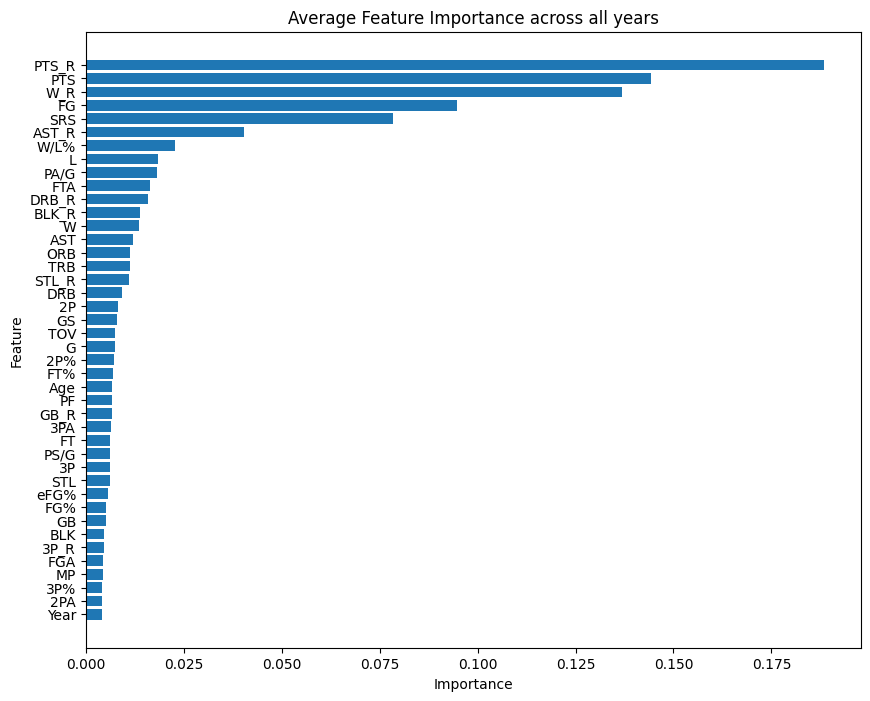

In [95]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    feature_importance_df = pd.DataFrame()  # Create an empty DataFrame to collect feature importances
    
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        
        model.fit(train[predictors], train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["Predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share", "Year"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
        
        # If model is RandomForest, extract feature importance
        if isinstance(model, RandomForestRegressor):
            feature_importances = model.feature_importances_
            temp_df = pd.DataFrame({
                'Feature': predictors,
                'Importance': feature_importances
            })
            feature_importance_df = pd.concat([feature_importance_df, temp_df], axis=0)

    # If feature_importance_df is not empty, average the feature importances across all years
    if not feature_importance_df.empty:
        avg_feature_importance = feature_importance_df.groupby('Feature').mean().sort_values(by='Importance', ascending=False)
        # Visualize Feature Importance
        plt.figure(figsize=(10,8))
        plt.barh(avg_feature_importance.index, avg_feature_importance['Importance'])
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title('Average Feature Importance across all years')
        plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at top
        plt.show()
    
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

# Specify the RandomForestRegressor as the model
rf = RandomForestRegressor(n_estimators=100, random_state=1, min_samples_split=5)

# Call your backtest function
mean_ap, aps, all_predictions = backtest(stats, rf, years[27:], predictors)

In [93]:
mean_ap

0.8895767195767196

Test End
___

Estimators = number of decision trees created, Random State = 1 = if we run the same code twice we'll get the same result, Min Sample Split = creates a specific number of branches based on the number of values we set. 5 means there wont be a split unless 5 values are in that node. Setting a lower number means a higher chance to over fit, but its more accurate and vice versa.

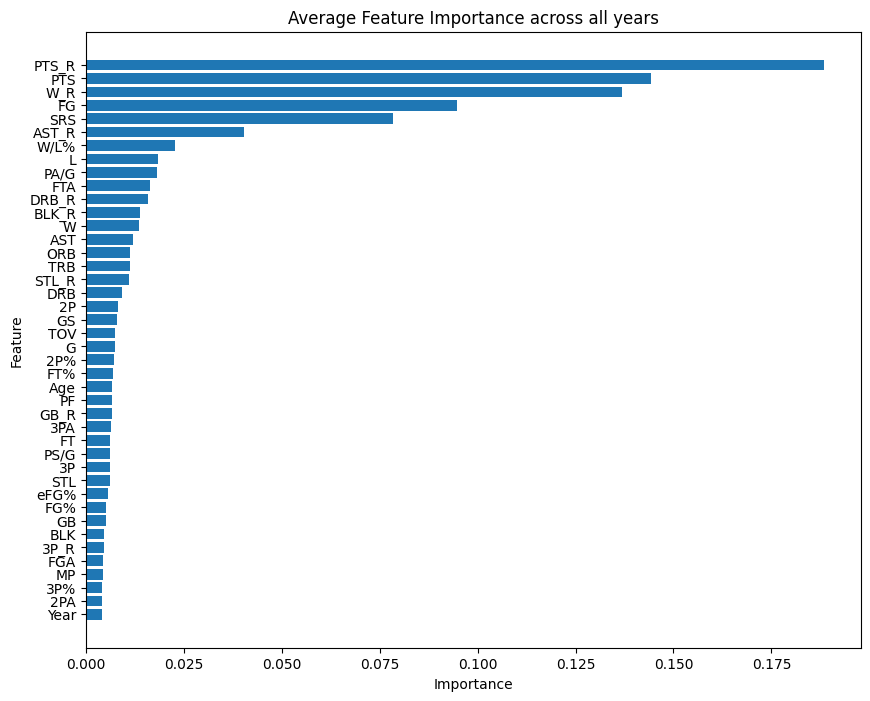

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 1, min_samples_split = 5)

mean_ap, aps, all_predictions = backtest(stats, rf, years[27:], predictors)

In [ ]:
mean_ap

In [94]:
all_predictions[all_predictions["Rank"] < 4].sort_values("Diff").head(10)

,Player,Share,Year,Predictions,Rank,Predicted Rank,Diff
600,Nikola Jokić,0.961,2021,0.180491,1,7,-6
11392,Giannis Antetokounmpo,0.595,2022,0.357168,3,5,-2
3818,LeBron James,0.746,2020,0.348855,2,3,-1
622,Nikola Jokić,0.875,2022,0.436853,1,2,-1
796,Joel Embiid,0.706,2022,0.422295,2,3,-1
12603,Giannis Antetokounmpo,0.952,2020,0.705292,1,1,0
8814,Joel Embiid,0.580,2021,0.274427,2,2,0
3749,Stephen Curry,0.449,2021,0.267270,3,3,0
9878,James Harden,0.363,2020,0.489252,3,2,1


Test Start
___

In [ ]:
#baseline_mean_ap = mean_ap

In [ ]:
#additional_predictors = ["W/L%_R", "GB_R", ...]  # your ratio predictors
#best_predictors = predictors.copy()  # start with your original predictor

In [ ]:
#for new_pred in additional_predictors:
    #temp_predictors = best_predictors + [new_pred]
    #mean_ap, _, _ = backtest(stats, rf, years[27:], temp_predictors)
    
    #if mean_ap > baseline_mean_ap:
        #best_predictors.append(new_pred)  # keep the new predictor
        #baseline_mean_ap = mean_ap

In [ ]:
#mean_ap, aps, all_predictions = backtest(stats, rf, years[27:], best_predictors)

Test Stop
___

In [ ]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[27:], predictors)

In [ ]:
mean_ap